# Name : Tharindu O.K.D
# Index No. : 190622R

Question 01

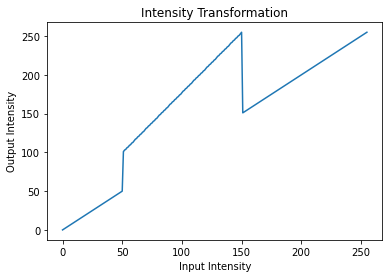

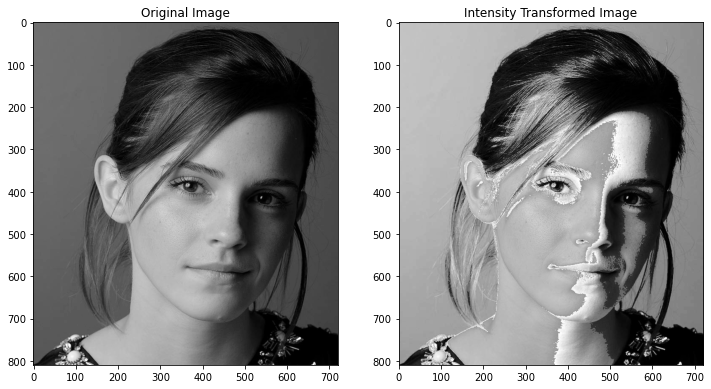

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

array_1 = np.array([ i for i in range(0,51)])
array_2 = np.array([ (155 / 100) * (i - 50) + 100 for i in range(51,151)])
array_3 = np.array([i for i in range(151,256)])
transform = np.concatenate((array_1, array_2, array_3),axis=0).astype(np.uint8)

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_title("Intensity Transformation")
ax.set_xlabel("Input Intensity")
ax.set_ylabel("Output Intensity")

im = cv.imread(r"emma_gray.jpg", cv.IMREAD_GRAYSCALE)
assert im is not None

transformed_image = cv.LUT(im, transform)

fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(im, cmap="gray", vmin=0, vmax=255)
ax[0].set_title("Original Image")
ax[1].imshow(transformed_image, cmap="gray", vmin=0, vmax=255)
ax[1].set_title("Intensity Transformed Image")
plt.show()


Question 02

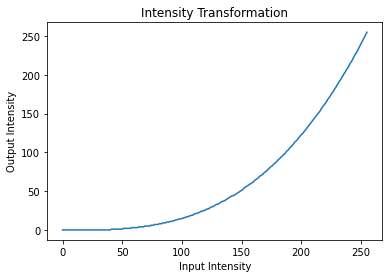

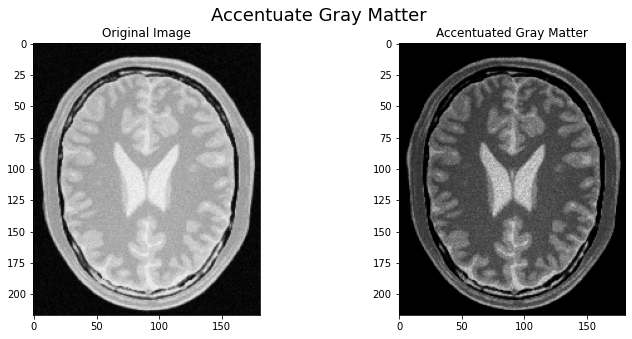

In [3]:
im = cv.imread(r"brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)
assert im is not None

# accentuate white matter
white_transform = np.array([((i / 255) ** 3) * 255 for i in range(0,256)],dtype=np.uint8)
white_transformed_image = cv.LUT(im, white_transform)

fig, ax = plt.subplots()
ax.plot(white_transform)
ax.set_title("Intensity Transformation")
ax.set_xlabel("Input Intensity")
ax.set_ylabel("Output Intensity")
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Accentuate Gray Matter", fontsize=18)
ax[0].imshow(im, cmap="gray", vmin=0, vmax=255)
ax[0].set_title("Original Image")
ax[1].imshow(white_transformed_image, cmap="gray", vmin=0, vmax=255)
ax[1].set_title("Accentuated Gray Matter")
plt.show()

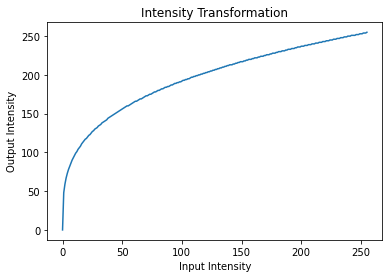

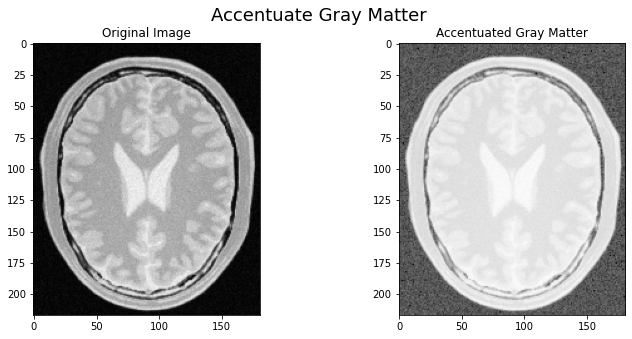

In [4]:
gray_transform = np.array([((i / 255) ** 0.3) * 255 for i in range(0,256)],dtype=np.uint8)
gray_transformed_image = cv.LUT(im, gray_transform)

fig, ax = plt.subplots()
ax.plot(gray_transform)
ax.set_title("Intensity Transformation")
ax.set_xlabel("Input Intensity")
ax.set_ylabel("Output Intensity")
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Accentuate Gray Matter", fontsize=18)
ax[0].imshow(im, cmap="gray", vmin=0, vmax=255)
ax[0].set_title("Original Image")
ax[1].imshow(gray_transformed_image, cmap="gray", vmin=0, vmax=255)
ax[1].set_title("Accentuated Gray Matter")
plt.show()

Question 03

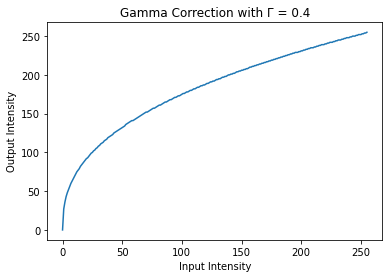

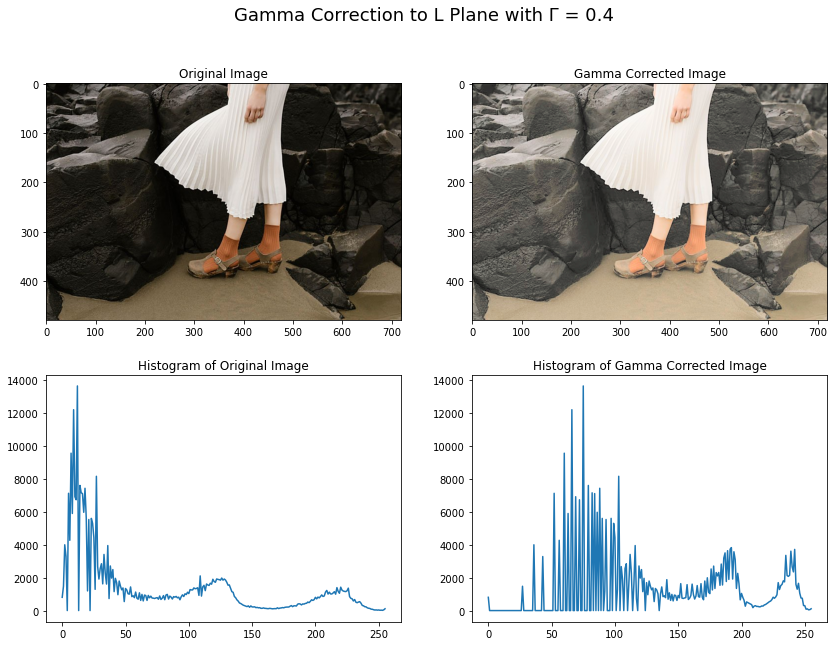

In [5]:
im = cv.imread(r"highlights_and_shadows.jpg")
assert im is not None

LAB_image = cv.cvtColor(im, cv.COLOR_BGR2LAB)
original_hist = cv.calcHist([LAB_image], [0], None, [256], [0, 256])
gamma = 0.4
gamma_correction = np.array([((i / 255) ** gamma) * 255 for i in range(0,256)],dtype=np.uint8)
LAB_image[:, :, 0] = cv.LUT(LAB_image[:, :, 0], gamma_correction)

fig, ax = plt.subplots()
ax.plot(gamma_correction)
ax.set_title("Gamma Correction with Γ = {}".format(gamma))
ax.set_xlabel("Input Intensity")
ax.set_ylabel("Output Intensity")
plt.show()

corrected_hist = cv.calcHist([LAB_image], [0], None, [256], [0, 256])

fig, ax = plt.subplots(2, 2, figsize=(14,10))
fig.suptitle("Gamma Correction to L Plane with Γ = {}".format(gamma), fontsize=18)
ax[0, 0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[0, 0].set_title("Original Image")
ax[0, 1].imshow(cv.cvtColor(LAB_image, cv.COLOR_LAB2RGB))
ax[0, 1].set_title("Gamma Corrected Image")
ax[1, 0].plot(original_hist)
ax[1, 0].set_title("Histogram of Original Image")
ax[1, 1].plot(corrected_hist)
ax[1, 1].set_title("Histogram of Gamma Corrected Image")
plt.show()

Question 04

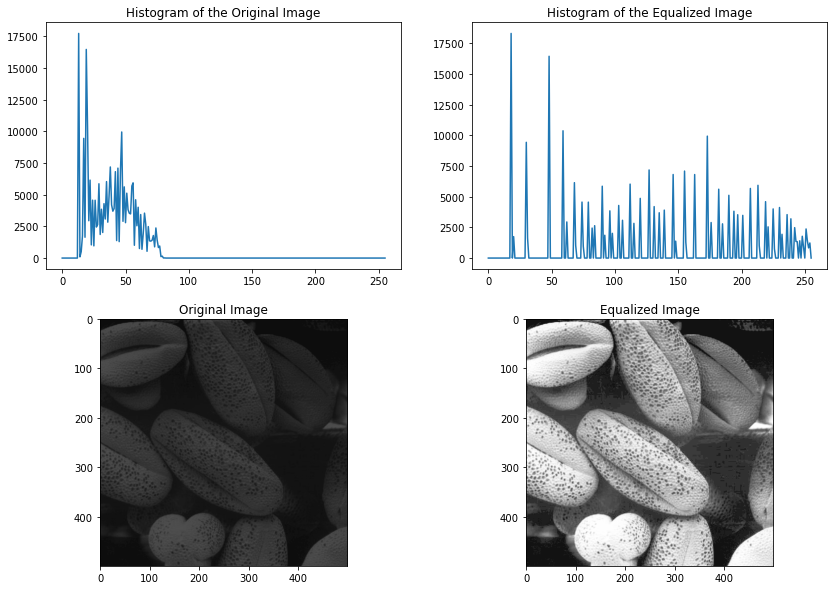

In [6]:
img = cv.imread(r"shells.png", cv.IMREAD_GRAYSCALE)
assert im is not None

original_hist = cv.calcHist([img], [0], None, [256], [0, 256])
cdf = original_hist.cumsum()
MN = img.shape[0] * img.shape[1]
equalize_transformation = np.array((cdf * 255) / MN, dtype=np.uint8)
equalize_img = cv.LUT(img, equalize_transformation)
equalize_hist = cv.calcHist([equalize_img], [0], None, [256], [0, 256])


fig, ax = plt.subplots(2, 2, figsize=(14,10))
ax[0, 0].plot(original_hist)
ax[0, 0].set_title("Histogram of the Original Image")
ax[0, 1].plot(equalize_hist)
ax[0, 1].set_title("Histogram of the Equalized Image")
ax[1, 0].imshow(img, cmap="gray", vmin=0, vmax=255)
ax[1, 0].set_title("Original Image")
ax[1, 1].imshow(equalize_img, cmap="gray", vmin=0, vmax=255)
ax[1, 1].set_title("Equalized Image")
plt.show()


In [20]:
import math
def nearestNeighborInterpolation(img, scale):
    scaled_dimentions = (round(img.shape[0] * scale), round(img.shape[1] * scale), img.shape[2])
    scaled_img = np.zeros(scaled_dimentions,dtype=np.uint8)
    
    for i in range(scaled_dimentions[0]):
        for j in range(scaled_dimentions[1]):
            scaled_img[i, j] = img[min(round(i / scale), img.shape[0] - 1), min(round(j / scale), img.shape[1] - 1)]

    return scaled_img

def bilinearInterpolation(img, scale):
    scaled_dimentions = (round(img.shape[0] * scale), round(img.shape[1] * scale), img.shape[2])
    scaled_img = np.zeros(scaled_dimentions,dtype=np.uint8)

    x_ratio = (img.shape[1] - 1) / (scaled_dimentions[1] - 1)
    y_ratio = (img.shape[0] - 1) / (scaled_dimentions[0] - 1)

    for i in range(scaled_dimentions[0]):
        for j in range(scaled_dimentions[1]):
            x_floor = math.floor(j * x_ratio)
            x_ceil = min(math.ceil(j * x_ratio), img.shape[1] - 1)
            y_floor = math.floor(i * y_ratio)
            y_ceil = min(math.ceil(i * y_ratio), img.shape[0] - 1)

            x_weight = (j * x_ratio) - x_floor
            y_weight = (i * y_ratio) - y_floor

            pixel_value = img[y_floor, x_floor] * (1 - x_weight) * (1 - y_weight) + \
                img[y_ceil, x_floor] * (x_weight) * (1 - y_weight) + \
                    img[y_floor, x_ceil] * (1 - x_weight) * (y_weight) + \
                        img[y_ceil, x_ceil] * (x_weight) * (y_weight)
            
            scaled_img[i, j] = pixel_value
            
    return scaled_img

def scale_image(img, scale, method):
    if method == "NEAREST_NEIGHBOR":
        return nearestNeighborInterpolation(img, scale)
    elif method == "BILINEAR":
        return bilinearInterpolation(img, scale)


img = cv.imread(r"a1q5images/a1q5images/im02small.png")
assert im is not None




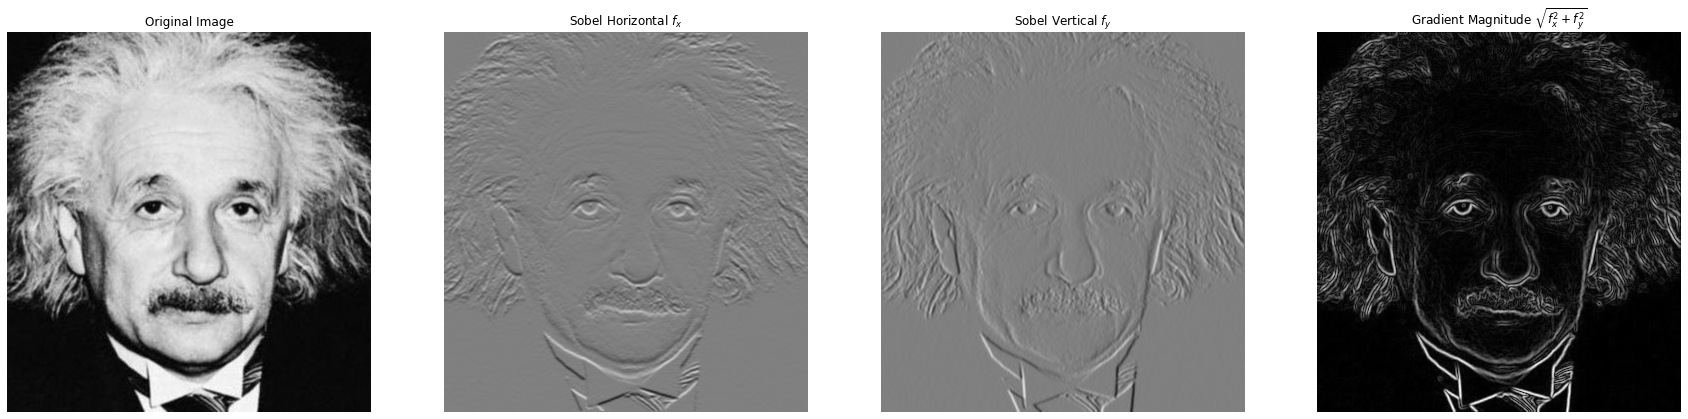

In [45]:
img = cv.imread(r"einstein.png", cv.IMREAD_GRAYSCALE).astype(np.float32)
assert im is not None

sobel_v_kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)
f_x = cv.filter2D(img, -1, sobel_v_kernel)
sobel_h_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
f_y = cv.filter2D(img, -1, sobel_h_kernel)
grad_mag_img = np.sqrt(f_x**2 + f_y**2)


fig, ax = plt.subplots(1, 4, figsize=(30, 18))
ax[0].imshow(img, cmap="gray", vmin=0, vmax=255)
ax[0].set_title("Original Image")
ax[1].imshow(f_x, cmap="gray", vmin=-1020, vmax=1020)
ax[1].set_title(r"Sobel Horizontal $f_x$")
ax[2].imshow(f_y, cmap="gray", vmin=-1020, vmax=1020)
ax[2].set_title(r"Sobel Vertical $f_y$")
ax[3].imshow(grad_mag_img, cmap="gray")
ax[3].set_title(r"Gradient Magnitude $\sqrt{f_x^2+f_y^2}$")
for i in range(4):
    ax[i].axis("off")
plt.show()


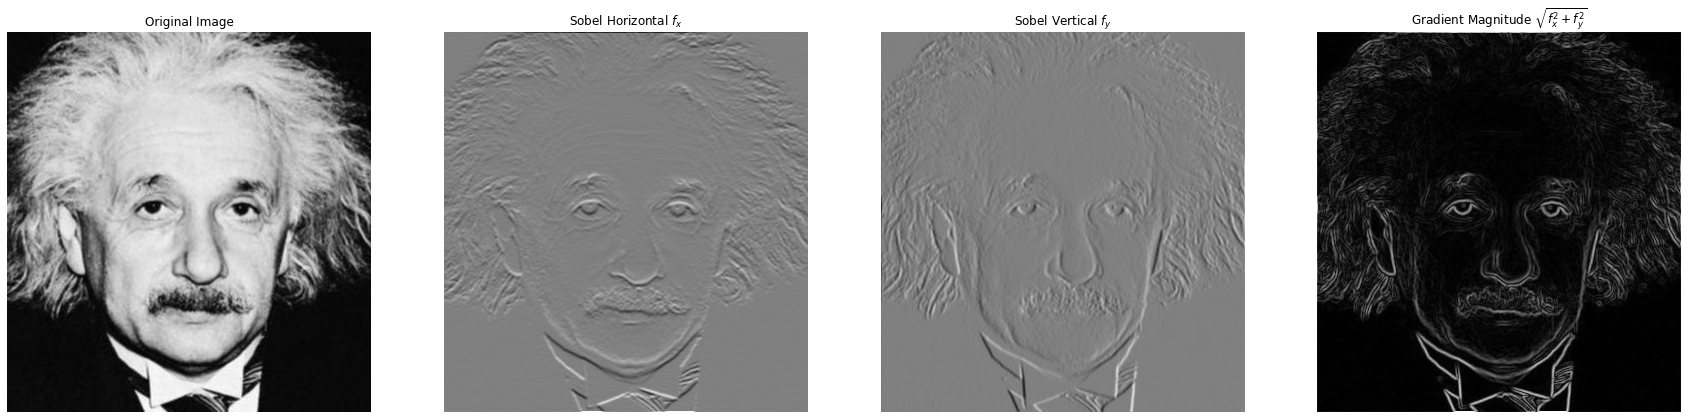

In [80]:
def sobel_filter(img, kernel):
    kernel = np.rot90(np.rot90(kernel)) # rotate 180 for convolution
    padded_img = np.zeros((img.shape[0] + 2, img.shape[1] + 2), dtype=np.float32)
    padded_img[1:padded_img.shape[0] - 1, 1:padded_img.shape[1] - 1] = img
    filtered_image = np.zeros(img.shape, dtype=np.float32)
    for i in range(filtered_image.shape[0]):
        for j in range(filtered_image.shape[1]):
            filtered_image[i, j] = (kernel * padded_img[i: i + 3, j: j + 3]).sum()
    return filtered_image

f_x = sobel_filter(img, np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32))
f_y = sobel_filter(img, np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32))
grad_mag_img = np.sqrt(f_x**2 + f_y**2)

fig, ax = plt.subplots(1, 4, figsize=(30, 18))
ax[0].imshow(img, cmap="gray", vmin=0, vmax=255)
ax[0].set_title("Original Image")
ax[1].imshow(f_x, cmap="gray", vmin=-1020, vmax=1020)
ax[1].set_title(r"Sobel Horizontal $f_x$")
ax[2].imshow(f_y, cmap="gray", vmin=-1020, vmax=1020)
ax[2].set_title(r"Sobel Vertical $f_y$")
ax[3].imshow(grad_mag_img, cmap="gray")
ax[3].set_title(r"Gradient Magnitude $\sqrt{f_x^2+f_y^2}$")
for i in range(4):
    ax[i].axis("off")
plt.show()